In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import statistics 
from scipy import stats
from scipy import signal
from scipy.stats import norm
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import lognorm
from pandas import DataFrame
from scipy.stats import expon
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import special
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Math, Latex
from IPython.core.display import Image
import pandas as pd

Problem 1


In [24]:
X = 10 #average cosmic background radiation, 1 day
Y = 45 #average hypothetical source, 1 day
N = 5 # number of days

To show how a distribution changes as its summed over multiple intervals, we will start with a Poisson background distribution.

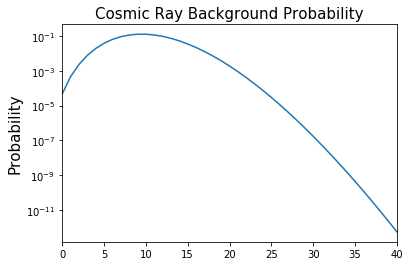

In [28]:
fig, ax = plt.subplots(1, 1)
#ax.hist(scipy.stats.poisson.rvs(X, size=100000),50, density=True)
mean, var, skew, kurt = poisson.stats(X, moments='mvsk')
plt.yscale('log')
plt.tick_params(labelsize = 10)
plt.xlim([0,40])
plt.title('Cosmic Ray Background Probability', fontsize='15')
plt.xlabel('', fontsize='15')
plt.ylabel('Probability', fontsize='15')
x = np.arange(poisson.ppf(0.00000001, X),
              poisson.ppf(0.9999999999999, X))
ax.plot(x,poisson.pmf(x, X))
plt.show()

The graph above demonstrates the background distribution of cosmic-ray detections in 1 day. To sum together days past 1 we will convolve day 1's distribution a few times.

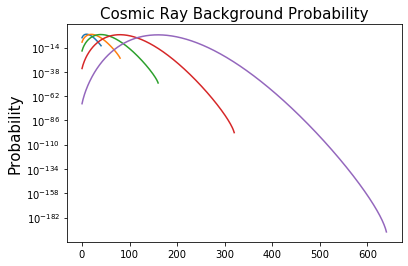

In [29]:
fig, ax = plt.subplots(1, 1)
#ax.hist(scipy.stats.poisson.rvs(X, size=100000),50, density=True)
mean, var, skew, kurt = poisson.stats(X, moments='mvsk')
plt.yscale('log')
plt.tick_params(labelsize = 10)
#plt.xlim([0,80])
plt.title('Cosmic Ray Background Probability', fontsize='15')
plt.xlabel('', fontsize='15')
plt.ylabel('Probability', fontsize='15')

f1 = np.arange(poisson.ppf(0.00000001, X),
              poisson.ppf(0.9999999999999, X))
P = poisson.pmf(f1, X)
Pc = signal.convolve(P,P, mode='full')
Pc2 = signal.convolve(Pc,Pc, mode='full')
Pc3 = signal.convolve(Pc2,Pc2, mode='full')
Pc4 = signal.convolve(Pc3,Pc3, mode='full')
x1 = np.arange(0,81,1)
x2 = np.arange(0,161,1)
x3 = np.arange(0,321,1)
x4 = np.arange(0,641,1)
ax.plot(f1,P)
ax.plot(x1,Pc)
ax.plot(x2,Pc2)
ax.plot(x3,Pc3)
ax.plot(x4,Pc4)

plt.show()

Shown above, as the same distribution gets summed over 5 days (blue, orange, green, red and finally purple), the distribution is spread across the x axis and the mean is shifted up. The overall shape does not change. This makes sense because as days of data are added any observers would expect to see more and more unlikly results and nothing is changed about the source of the data so there is no reason the shape of the distribution would change as more data is added.


The way I think about this result intuitively is like this:

If I were to sit and record the heights of people as they stepped off a train, already knowing how height is distributed across humans (in the case of a poisson distribution more likely tall than short), I would predict that out of the small sample size of one train car I would be much more likely to record passangers of heights around the mean human height. But if I kept watching as more trains pulled in and more train cars emptied I would expect this larger sample size to contain more passangers further from the mean height than i would have found in just one train car. Nothing has changed about how human height is distributed, I've simply given myself more time to record less common occurances. This results in a distribution that is the same shape but larger in scale and with a new mean that is representitive of the increased chance of measuring less probable results.


But, the story is different when instead of summing over days, the distribution is averaged.

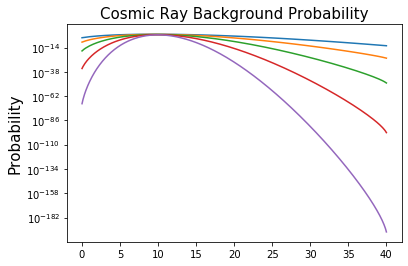

In [30]:
fig, ax = plt.subplots(1, 1)
#ax.hist(scipy.stats.poisson.rvs(X, size=100000),50, density=True)
mean, var, skew, kurt = poisson.stats(X, moments='mvsk')
plt.yscale('log')
plt.tick_params(labelsize = 10)
#plt.xlim([0,80])
plt.title('Cosmic Ray Background Probability', fontsize='15')
plt.xlabel('', fontsize='15')
plt.ylabel('Probability', fontsize='15')

f = np.arange(poisson.ppf(0.00000001, X),
              poisson.ppf(0.9999999999999, X))
P = poisson.pmf(f, X)
Pc1 = signal.convolve(P,P, mode='full')
Pc2 = signal.convolve(Pc,Pc, mode='full')
Pc3 = signal.convolve(Pc2,Pc2, mode='full')
Pc4 = signal.convolve(Pc3,Pc3, mode='full')
x1 = np.arange(0,40.5,1/2)
x2 = np.arange(0,40.25,1/4)
x3 = np.arange(0,40.125,1/8)
x4 = np.arange(0,40.0625,1/16)
ax.plot(f,P)
ax.plot(x1,Pc1)
ax.plot(x2,Pc2)
ax.plot(x3,Pc3)
ax.plot(x4,Pc4)

plt.show()

Shown above, as the same distribution gets averaged over 5 days, the distribution begins to dip in probability at the extremes while the mean result is accented. This makes sense in comparison to the previous situation because when averaging trials the observer is not allowing more time for less likely results, on the contrary averaging compounds the respective probabilities.

To use the same train car and height example:

In this case instead of just counting up all of the heights recorded, I am recording each train car full of people on its own, and averaging my observations at the end. While the previous summation gave a good model for the distribution of larger and larger groups of people, this average gives a more and more accurate model for the distribution of heights in a single train car. 

Interestingly, the resulting distribution of the repeated averaging of the intitial distribution is a gaussian. This behavoir is incapsulated by the "central limit theorem" which postulates that "the distribution of sample means approximates a normal distribution as the sample size gets larger".

D) calculating the sigma value of a measurment of 45 a day over 5 days:

In [34]:
Measure_Y = Y*N #number of gammarray detections over N days (45 detections * 5 days)
probHPc4 = np.sum(Pc4[Measure_Y:]) # probability of measuring a number of signals Y*N or higher
sig_HPc4 = abs(stats.norm.ppf(probHPc4)) #the sigma value
#print(Measure_Y)
#print(np.sum(Pc4))
#print(probHPc4)
print('proabability : ', sig_HPc4, '"sigma"')

proabability :  4.816293018245039 "sigma"


PROBLEM 2

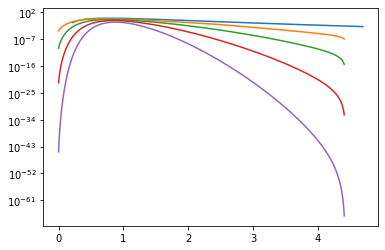

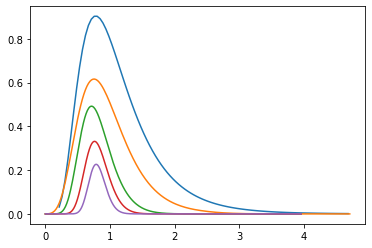

In [9]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(lognorm.ppf(0.001,0.5),
               lognorm.ppf(0.999,0.5), 100)
PR = lognorm.pdf(x, 0.5)
Pc1R = np.convolve(PR,PR, mode='full')/20
Pc2R = np.convolve(Pc1R,Pc1R, mode='full')/30
Pc3R = np.convolve(Pc2R,Pc2R, mode='full')/30
Pc4R = np.convolve(Pc3R,Pc3R, mode='full')/30
x1 = np.arange(0,199/45,1/45)
x2 = np.arange(0,397/90,1/90)
x3 = np.arange(0,793/180,1/180)
x4 = np.arange(0,1585/(180*2),1/(180*2))
ax.plot(x,PR)
ax.plot(x1,Pc1R)
ax.plot(x2,Pc2R)
ax.plot(x3,Pc3R)
ax.plot(x4,Pc4R)
plt.yscale('log')
fig, ax = plt.subplots(1, 1)
mean, var, skew, kurt = lognorm.stats(X, moments='mvsk')
#plt.yscale('log')
plt.tick_params(labelsize = 10)
plt.title('', fontsize='15')
plt.xlabel('', fontsize='15')
plt.ylabel('', fontsize='15')
#plt.xlim([0,5])

x = np.linspace(lognorm.ppf(0.001,0.5),
               lognorm.ppf(0.999,0.5), 100)
PR = lognorm.pdf(x, 0.5)
Pc1R = np.convolve(PR,PR, mode='full')/20
Pc2R = np.convolve(Pc1R,Pc1R, mode='full')/20
Pc3R = np.convolve(Pc2R,Pc2R, mode='full')/30
Pc4R = np.convolve(Pc3R,Pc3R, mode='full')/30
x1 = np.arange(0,199/42,1/42)
x2 = np.arange(0,397/100,1/100)
x3 = np.arange(0,793/200,1/200)
x4 = np.arange(0,1585/(400),1/(400))
ax.plot(x,PR)
ax.plot(x1,Pc1R)
ax.plot(x2,Pc2R)
ax.plot(x3,Pc3R)
ax.plot(x4,Pc4R)

plt.show()

Above is the result of averaging a lognormal distribution 5 times (adjusted to see the shape easier). As we have seen before, the extremeties of the distribution wither away with subsiquent averaging, and the mean is further accented. The shape gets more and more gaussian over time, and after about 6 averages the resulting distibution is recognizably gaussian. (shown below)

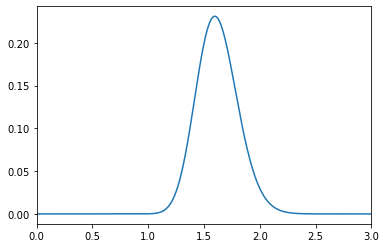

In [10]:
fig, ax = plt.subplots(1, 1)
mean, var, skew, kurt = lognorm.stats(X, moments='mvsk')
plt.tick_params(labelsize = 10)
plt.title('', fontsize='15')
plt.xlabel('', fontsize='15')
plt.ylabel('', fontsize='15')
x5 = np.arange(0,3169/(400),1/(400))
plt.xlim([0,3])
ax.plot(x5,np.convolve(Pc4R,Pc4R)/20)

plt.show()

PROBLEM 3

In [37]:
X = 5
Y_signal = 18.2

In [38]:
Back_grnd_gauss = stats.norm(X, 2.5)
#BGG_pdf = Back_grnd_gauss.pdf(x)
prob_Y = 1-Back_grnd_gauss.cdf(Y_signal)
abs(stats.norm.ppf(prob_Y))

5.280000000060521

Version 1) As calculated above, with the background distribution ive used, a signal of 18.2 does have an assosiated sigma value above 5... So technically I can claim a discovery.

In [39]:
prob_Y1 = 10000*(1-Back_grnd_gauss.cdf(Y_signal))
abs(stats.norm.ppf(prob_Y1))

3.2177866140508438

Version 2) statistical question: " given the same background distribution, but with 10,000 trials instead of one, how does the probability and sigma of the hypothetical measuremnt change with the added trials.?"

As calculated above, with the background ive used applied over 10000 trials, a signal of 18.2 no longer has an associated sigma value of 5 but rather 3.2178. Despite 10k trials being the only change, I can no longer claim a discovery. 

PROBLEM 4

In [14]:
prob_5sig = 0.00000028666
abs(stats.norm.ppf(prob_5sig))

4.999994331142305

Working backwards i found that 5 sigma on a normal distribution is associated with a probability of 0.00000028666. Using this i can work backwards further to find the signals that would produce this probability in each version of the experiment:

In [15]:
signal_5sig_v1 = 17.50
(1 - Back_grnd_gauss.cdf(signal_5sig_v1))

2.866515719235352e-07

In [16]:
signal_5sig_v2 = 21.37635
(10000*(1 - Back_grnd_gauss.cdf(signal_5sig_v2)))

2.8664737250494454e-07

As calculated above, the first version requires a signal of around 17.500, and the second requires a signal of around 21.376 to produce the same sigma value. 

C) This result tells us that the signal needs to be 20% brighter for discovery with a trial factor of 10,000. This is a notable difference but suprisingly small. This small sensitivity penality has more to do with the exponential dropoff of probability as you move away from the mean than anything else. Even with a large trial factor, its hard to change the probabilites at the extremes of the distribution, and this makes it hard to change the sigma.

D) As calculated below, increasing the trial factor to 1 million only changes the sigma threshold by 1.5, only 7%

In [44]:
prob_Y2 = 1000000*(1-Back_grnd_gauss.cdf(Y_signal))
abs(stats.norm.ppf(prob_Y2))

1.5173280228260535

In [69]:
signal_5sig_v3 = 23.02
(1000000*(1 - Back_grnd_gauss.cdf(signal_5sig_v3)))

2.8388402739665253e-07

Extra:

The shape of the curve could effect the sensitivity greatly. The first example that comes to mind is a heavily skewed distribution like the lognormal one shown earlier in the lab. The higher proabbilities streached across the x axis in one diretion could be more effected by the proabbility compounding effects of more trials. Definetly more effected than the exponentialy decreasing probabilites at the extremes of a gaussian. 